# Classifier for occurrences of Systemic Crises in Africa
## - Data from https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data

## Imports and reading in the data, examining

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('african_crises.csv')

df.head(10)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
5,1,DZA,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,no_crisis
6,1,DZA,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,no_crisis
7,1,DZA,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,no_crisis
8,1,DZA,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,no_crisis
9,1,DZA,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,no_crisis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


## Dealing with categorical variables

In [4]:
df['banking_crisis'] = df['banking_crisis'].map({'no_crisis': 0, 'crisis': 1})

df['banking_crisis'].value_counts()

0    965
1     94
Name: banking_crisis, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null int64
dtypes: float64(3), int64(9), object(2)
memory usage: 116.0+ KB


In [6]:
d = pd.get_dummies(df, columns=['year','cc3', 'country', 'case'])

d

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,...,case_15,case_19,case_35,case_38,case_40,case_45,case_56,case_63,case_69,case_70
0,1,0.052264,0,0,0.0,3.441456,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.052798,0,0,0.0,14.149140,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.052274,0,0,0.0,-3.718593,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.051680,0,0,0.0,11.203897,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.051308,0,0,0.0,-3.848561,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,1,354.800000,1,1,0.0,-7.670000,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1055,0,378.200000,1,1,0.0,3.217000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1056,0,361.900000,1,1,0.0,4.920000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1057,0,361.900000,1,1,0.0,3.720000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df = d

df.head()

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,...,case_15,case_19,case_35,case_38,case_40,case_45,case_56,case_63,case_69,case_70
0,1,0.052264,0,0,0.0,3.441456,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.052798,0,0,0.0,14.149140,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.052274,0,0,0.0,-3.718593,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.051680,0,0,0.0,11.203897,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.051308,0,0,0.0,-3.848561,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling: train test split, MinMax scaling, Logistic Regression and metrics

In [9]:
X = df.drop('systemic_crisis',axis=1)
y = df['systemic_crisis']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
Accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy : ',Accuracy,'%')
print('Confusion Matrix : \n')
confusion_matrix(y_test,y_pred)

Accuracy :  97.35849056603773 %
Confusion Matrix : 



array([[241,   3],
       [  4,  17]])

/Users/michael/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


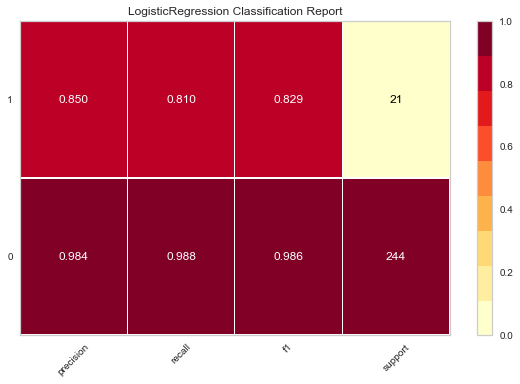

In [26]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(clf, classes=[0,1], support=True)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)
visualizer.show()              

# Note: This was pretty quick, and accurate, it should be used as a springboard for future projects around economic instability. See my other work at https://github.com/MichaelBurak/National-Material-Capabilities for thematically linked and possibly relevant data work.